In [112]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_absolute_error
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import r2_score
from statsmodels.tsa.stattools import adfuller
from pmdarima import auto_arima
from statsmodels.tsa.arima_model import ARIMA
#Ignore warnings
import warnings
import scipy
from datetime import datetime
from platform import python_version
import statsmodels.api as sm
import matplotlib.dates as mdates
print(python_version())
warnings.filterwarnings('ignore')

3.9.7


['Adur', 'Allerdale', 'Amber Valley', 'Arun', 'Ashfield', 'Ashford', 'Aylesbury Vale', 'Babergh', 'Barking and Dagenham', 'Barnet', 'Barnsley', 'Barrow-in-Furness', 'Basildon', 'Basingstoke and Deane', 'Bassetlaw', 'Bath and North East Somerset', 'Bedford', 'Bexley', 'Birmingham', 'Blaby', 'Blackburn with Darwen', 'Blackpool', 'Blaenau Gwent', 'Bolsover', 'Bolton', 'Boston', 'Bournemouth', 'Bracknell Forest', 'Bradford', 'Braintree', 'Breckland', 'Brent', 'Brentwood', 'Bridgend', 'Brighton and Hove', 'Bristol', 'Broadland', 'Bromley', 'Bromsgrove', 'Broxbourne', 'Broxtowe', 'Burnley', 'Bury', 'Caerphilly', 'Calderdale', 'Cambridge', 'Camden', 'Cannock Chase', 'Canterbury', 'Cardiff', 'Carlisle', 'Carmarthenshire', 'Castle Point', 'Central Bedfordshire', 'Ceredigion', 'Charnwood', 'Chelmsford', 'Cheltenham', 'Cherwell', 'Cheshire East', 'Cheshire West and Chester', 'Chesterfield', 'Chichester', 'Chiltern', 'Chorley', 'Christchurch', 'City of London', 'Colchester', 'Conwy', 'Copeland', '

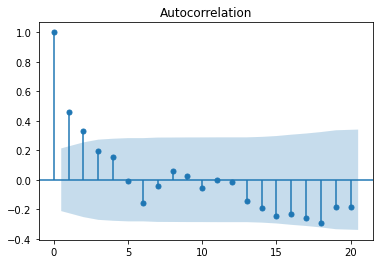

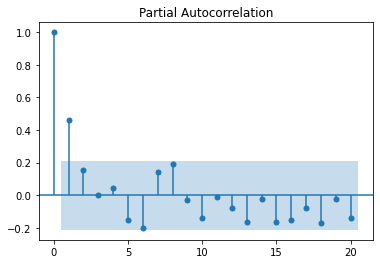

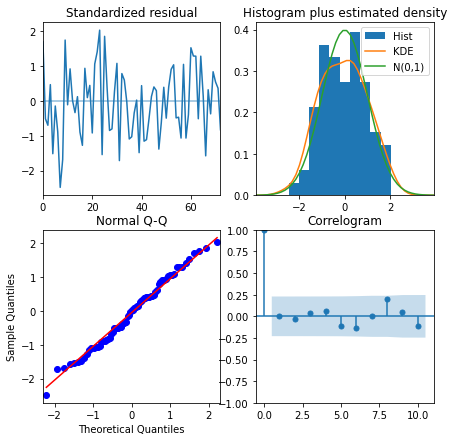

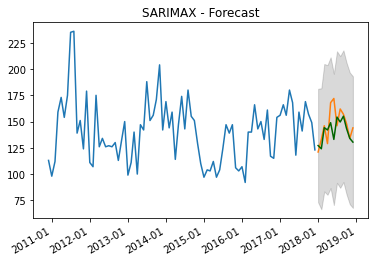

In [116]:
burg = 'burglarys city'
col = burg
n_periods = 12
city = 'Blackpool'

df = pd.read_csv('C:\\Users\\20203666\\Documents\\JBG050-data\\final_burglary_data_city1.csv')
print(sorted(df['city'].unique()))
df['year month'] = [datetime.strptime(date, '%Y-%m') for date in df['year month']]
df_city = df.loc[df['city'] == city]
# Reset index to stop expected value error

df_city_index_reset = df_city.reset_index(drop = True)

#Sort it on year/month to perform ARIMA
df_city_sorted = df_city_index_reset.set_index(df_city_index_reset['year month'])

df_city_train = df_city_sorted['2010-12':'2017-12']
adf = adfuller(df_city_train[col].dropna())

if adf[1] >0.05:
    df_city_sorted['diff burglarys city'] = df_city_sorted[col].diff()
    col= 'diff burglarys city'
    
#Create test partition
df_city_train = df_city_sorted['2010-12':'2017-12']
df_city_test  = df_city_sorted['2018-1':'2019-12']

plot_acf(df_city_train[col].dropna())
plot_pacf(df_city_train[col].dropna())

smodel = auto_arima(df_city_train[col].dropna(), start_p=1, start_q=1,
                    test='adf',
                    max_p=3, max_q=3, m=12,
                    start_P=0, seasonal=True,
                    d=0, D=1, trace=True,
                    error_action='ignore',
                    suppress_warnings=True,
                    stepwise=True)
print(smodel.summary())

fitted, confint = smodel.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = df_city_test.index[:n_periods]

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

smodel.plot_diagnostics(figsize=(7, 7))
plt.show()
col = 'burglarys city'
if adf[1] > 0.05:
    for i in range(len(df_city_test[:n_periods])):
        if i == 0:
            y = df_city_train[col][-1]
        predicted_upper = y +upper_series[i]
        upper_series[i] = predicted_upper
        predicted_y = y+fitted_series[i]
        fitted_series[i] = predicted_y
        predicted_lower = y+lower_series[i]
        lower_series[i] = predicted_lower
        y=predicted_y

# Plot
plt.plot(df_city_train[col].dropna())
plt.plot(df_city_test[col][:n_periods].dropna())
plt.plot(fitted_series, color='darkgreen')
plt.fill_between(lower_series.index,
                 lower_series,
                 upper_series,
                 color='k', alpha=.15)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gcf().autofmt_xdate()
plt.title("SARIMAX - Forecast")
plt.show()

In [114]:
print('MAE:', mean_absolute_error(df_city_test[col][:n_periods].dropna(), fitted_series))
print("R2:", r2_score(df_city_test[col][:n_periods].dropna(), fitted_series))

MAE: 21.633627382517847
R2: 0.6678307836909797


In [115]:
from statsmodels.tsa.stattools import adfuller

#perform augmented Dickey-Fuller test
adfuller(df_city_train[col].dropna())

(-0.8968700575085289,
 0.78900140503725,
 11,
 73,
 {'1%': -3.5232835753964475,
  '5%': -2.902030597326081,
  '10%': -2.5883710883843123},
 716.0968082163708)

In [48]:
all_adf = []
for city in sorted(df['city'].unique()):
    print(city)
    df_city = df.loc[df['city'] == city]
    # Reset index to stop expected value error

    df_city_index_reset = df_city.reset_index(drop = True)

    #Sort it on year/month to perform ARIMA
    df_city_sorted = df_city_index_reset.set_index(df_city_index_reset['year month'])

    #Create test partition
    df_city_train = df_city_sorted['2010-12':'2017-12']
    df_city_test  = df_city_sorted['2017-12':'2019-12']
    adf = adfuller(df_city_train[col].dropna())
    all_adf.append([adf[1], city])

Adur
Allerdale
Amber Valley
Arun
Ashfield
Ashford
Aylesbury Vale
Babergh
Barking and Dagenham
Barnet
Barnsley
Barrow-in-Furness
Basildon
Basingstoke and Deane
Bassetlaw
Bath and North East Somerset
Bedford
Bexley
Birmingham
Blaby
Blackburn with Darwen
Blackpool
Blaenau Gwent
Bolsover
Bolton
Boston
Bournemouth
Bracknell Forest
Bradford
Braintree
Breckland
Brent
Brentwood
Bridgend
Brighton and Hove
Bristol
Broadland
Bromley
Bromsgrove
Broxbourne
Broxtowe
Burnley
Bury
Caerphilly
Calderdale
Cambridge
Camden
Cannock Chase
Canterbury
Cardiff
Carlisle
Carmarthenshire
Castle Point
Central Bedfordshire
Ceredigion
Charnwood
Chelmsford
Cheltenham
Cherwell
Cheshire East
Cheshire West and Chester
Chesterfield
Chichester
Chiltern
Chorley
Christchurch
City of London
Colchester
Conwy
Copeland
Corby
Cornwall
Cotswold
County Durham
Coventry
Craven
Crawley
Croydon
Dacorum
Darlington
Dartford
Daventry
Denbighshire
Derby
Derbyshire Dales
Doncaster
Dover
Dudley
Ealing
East Cambridgeshire
East Devon
East Dor

In [50]:
count = 0
for p_value in all_adf:
    if p_value[0] > 0.05:
        print(p_value)
        count+=1
count/len(all_adf)

[0.12379602018514313, 'Amber Valley']
[0.8197394408901681, 'Barking and Dagenham']
[0.6690847719840085, 'Barnet']
[0.16416670590697602, 'Barnsley']
[0.3121104569507079, 'Birmingham']
[0.6118531835209174, 'Bolsover']
[0.37463663921148715, 'Bracknell Forest']
[0.28466287826409564, 'Bradford']
[0.761108449751251, 'Brent']
[0.3093753497543549, 'Bridgend']
[0.17750002482021277, 'Brighton and Hove']
[0.78900140503725, 'Bromley']
[0.8802255884924897, 'Bromsgrove']
[0.1714308836400229, 'Broxtowe']
[0.2710978008103583, 'Caerphilly']
[0.10586576036332707, 'Cambridge']
[0.09057953937425195, 'Cardiff']
[0.560231983025205, 'Castle Point']
[0.5592115643575387, 'Cherwell']
[0.3573064629831805, 'Cheshire West and Chester']
[0.30474988069151976, 'Chichester']
[0.3484844670132945, 'Chiltern']
[0.0655425402195777, 'Corby']
[0.6099586148989727, 'Cornwall']
[0.16892929410676188, 'Coventry']
[0.6121622687091509, 'Crawley']
[0.4786515087257871, 'Croydon']
[0.12146794734915523, 'Darlington']
[0.14266232967891

0.27298850574712646

In [101]:
for i in range(len(df_city_test[:n_periods])):
    if i ==0:
        y = df_city_train[col][-1]
    predictid_y = y+fitted_series[i]
    print(predictid_y)
    fitted_series[i] = predictid_y
    y=predictid_y

249.0554954015162
246.46895898777444
263.7206673723898
236.21052245640232
214.66732299226632
183.65383908881134
189.9111854238601
189.42014148725616
192.08102582652396
185.6270037262774
254.80965904296767
252.7563591550171


[249.0554954015162,
 246.46895898777444,
 263.7206673723898,
 236.21052245640232,
 214.66732299226632,
 183.65383908881134,
 189.9111854238601,
 189.42014148725616,
 192.08102582652396,
 185.6270037262774,
 254.80965904296767,
 252.7563591550171]

In [106]:
lower_series

year month
2018-01-01    -61.839403
2018-02-01    -85.280737
2018-03-01    -65.442492
2018-04-01   -110.204346
2018-05-01   -104.237400
2018-06-01   -113.707685
2018-07-01    -76.436854
2018-08-01    -83.185245
2018-09-01    -80.033316
2018-10-01    -89.148223
2018-11-01    -13.511545
2018-12-01    -84.743204
dtype: float64

In [107]:
upper_series

year month
2018-01-01     79.950394
2018-02-01     80.107664
2018-03-01     99.945909
2018-04-01     55.184056
2018-05-01     61.151001
2018-06-01     51.680717
2018-07-01     88.951547
2018-08-01     82.203157
2018-09-01     85.355085
2018-10-01     76.240179
2018-11-01    151.876856
2018-12-01     80.636604
dtype: float64